In [5]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

Using TensorFlow backend.


In [13]:
imgs_path = "..\\path\\to\\images"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 10 # number of most similar images to retrieve

In [7]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [16]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("Total images:",len(files))

Total images: 239


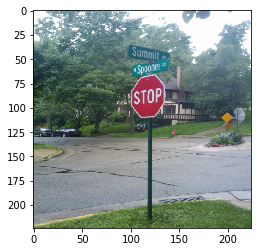

image loaded successfully!


In [18]:
# load image resized
original = load_img(files[2], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [28]:
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

image batch size (1, 224, 224, 3)


In [29]:
# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

In [30]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[0.       , 1.6552705, 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [31]:
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [34]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(239, 4096)

In [35]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,D:\wpi\mediate\open-images-read-subset\train\stop_sign\0121f9c615042091.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\01550f1b9680c4ce.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\017f45b1410d3ddb.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\02bc0f41c8d6d58b.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\02c3ca715cba6581.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\0378cdb594c70f0c.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\03ad336e93d5c743.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\03d6cb4943ec9914.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\049f652ae942fb61.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\04afaf46b27357dd.jpg,...,D:\wpi\mediate\open-images-read-subset\train\stop_sign\f22831d70c991490.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\f476d7bb611de99e.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\f4a9a5a3c9b66918.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\f65645b5c1981583.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\f6f8b3ce620f6ef4.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\f8015427c4017768.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\f93dff5e31fd2342.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\fc838dcbb06070d8.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\fcae8edb6363574b.jpg,D:\wpi\mediate\open-images-read-subset\train\stop_sign\ff673405a903e067.jpg
D:\wpi\mediate\open-images-read-subset\train\stop_sign\0121f9c615042091.jpg,1.000000,0.317053,0.594884,0.364113,0.556751,0.385369,0.269470,0.425340,0.401788,0.440865,...,0.463159,0.389722,0.340245,0.549187,0.282237,0.492670,0.425661,0.242524,0.383445,0.406458
D:\wpi\mediate\open-images-read-subset\train\stop_sign\01550f1b9680c4ce.jpg,0.317053,1.000000,0.340770,0.165699,0.286864,0.456405,0.158368,0.194564,0.367447,0.235959,...,0.355210,0.451688,0.197134,0.364847,0.232568,0.403403,0.441667,0.302560,0.372450,0.301330
D:\wpi\mediate\open-images-read-subset\train\stop_sign\017f45b1410d3ddb.jpg,0.594884,0.340770,1.000000,0.471570,0.535717,0.354988,0.293421,0.458644,0.442111,0.398978,...,0.544748,0.527654,0.380037,0.678208,0.332304,0.477129,0.572666,0.230485,0.458239,0.446452
D:\wpi\mediate\open-images-read-subset\train\stop_sign\02bc0f41c8d6d58b.jpg,0.364113,0.165699,0.471570,1.000000,0.419311,0.302962,0.304601,0.353086,0.382868,0.383471,...,0.400809,0.335223,0.298644,0.515590,0.270583,0.303520,0.354633,0.194139,0.271378,0.303390
D:\wpi\mediate\open-images-read-subset\train\stop_sign\02c3ca715cba6581.jpg,0.556751,0.286864,0.535717,0.419311,1.000000,0.329050,0.275044,0.446056,0.439275,0.369845,...,0.402522,0.334629,0.356360,0.519294,0.348266,0.392383,0.395600,0.264773,0.416144,0.391334


In [36]:
# function to retrieve the most similar images for a given one

def retrieve_most_similar_images(given_img):

    print("-----------------------------------------------------------------------")
    print("Image Query:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("Image results based on cosine similarity:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
Image Query:


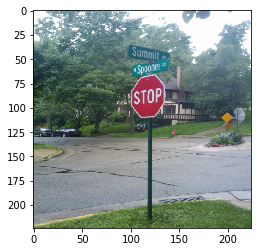

-----------------------------------------------------------------------
Image results based on cosine similarity:


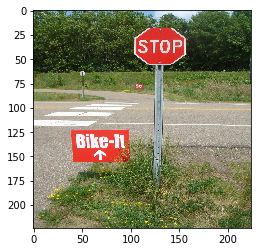

similarity score :  0.7792834


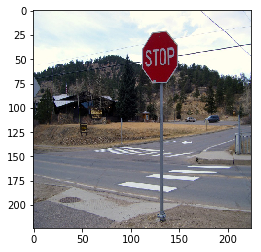

similarity score :  0.7249127


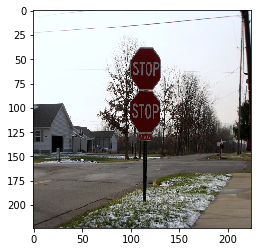

similarity score :  0.70828676


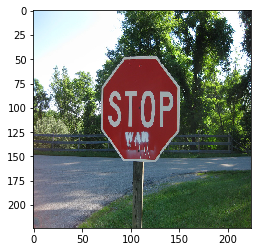

similarity score :  0.706627


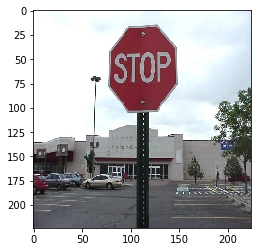

similarity score :  0.70434237


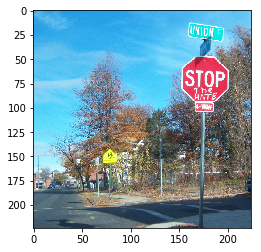

similarity score :  0.70067495


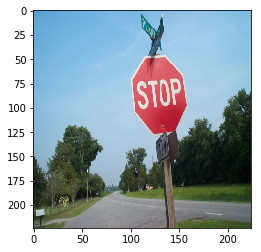

similarity score :  0.68942964


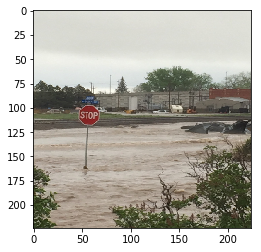

similarity score :  0.67926866


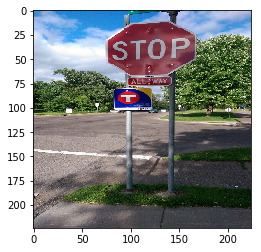

similarity score :  0.6782081


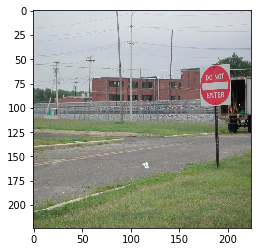

similarity score :  0.6711522


In [37]:
# retrieve the most N similar images
retrieve_most_similar_images(files[2])